<a href="https://colab.research.google.com/github/vilsonrodrigues/ComputerVision/blob/master/NumberRecognition-Topicos1/Reconhecimento_de_N%C3%BAmeros_com_OpenCV_e_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 

Descompactando um arquivo Zip 

In [0]:
!unzip numeros.zip

Função para separar as imagens e os labels delas correspondentes

In [0]:
images = []
labels = []
def traverse_dir(path):
    for file_or_dir in os.listdir(path):
        abs_path = os.path.abspath(os.path.join(path, file_or_dir))
        print(abs_path)
        if os.path.isdir(abs_path):  # dir
            traverse_dir(abs_path)
        else:                        # file
            if file_or_dir.endswith('.jpg'):
                image = read_image(abs_path)
                images.append(image)
                labels.append(path[len(path)-1])

    return images, labels


Função para converter em tons de cinza e depois inverter a cor a fim de facilitar a identificação dos caracteres

In [0]:
def read_image(file_path):
    image = cv2.imread(file_path)
    # converte para tons de cinza 
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # inverte a cor 
    image = cv2.bitwise_not(gray_scale) 
    return image


def extract_data(path):
    images, labels = traverse_dir(path)
    images = np.array(images)

    return images, labels

Extraindo da pasta e depois aplicando reshape nas labels

In [0]:
images, labels = extract_data('./numeros/')
labels = np.reshape(labels, [-1])

Teste para verificar a imagem e o seu alvo (o número no caso)

Images shape: (1170, 28, 32)
Labels shape: (1170,)
1


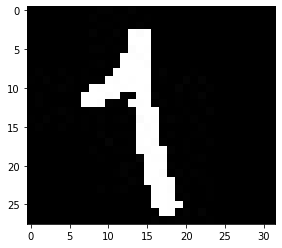

In [24]:
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

plt.imshow(images[11],cmap=plt.get_cmap("gray") )

print(labels[11])

Codificação de Rótulos 

In [25]:
le = preprocessing.LabelEncoder()
le.fit(labels)
list(le.classes_)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [26]:
labels 

array(['1', '1', '1', ..., '3', '3', '3'], dtype='<U1')

In [0]:
labels_enc = le.transform(labels)

In [29]:
print(labels_enc[0])
print(labels[0])

1
1


Separando o conjunto em treino e teste

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 10)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28*32) 
X_test = X_test.reshape(X_test.shape[0], 28*32) 

In [32]:
X_train.shape

(877, 896)

In [33]:
X_train[0]

array([255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
         0,   1,   1,   0,   0,   0,   0,   2,   0,   0,   3,   0,   0,
         2,   2,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,
         0,   2,   1,   2,   0,   0,   1,   0,   0,   1,   0,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   4,   0,   0,   1,   0,   0,   2,   3,   0,
         4,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   3,   0,   1,   0,   2,
         0,   2, 254, 255, 252,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   1,
         1,   0,   0,   0, 255, 254, 255, 255, 251, 255, 255, 25

Aplicando uma redução de dimensionaldidade aos dados

In [0]:
X_train = X_train/255
X_test = X_test/255

Transformando os números em vetor de características

In [0]:
from keras.utils.np_utils import to_categorical

Mantendo o Y para saber o alvo ao final do treino e o test e train são transformados em vetores de características de tamanho 10

In [0]:
y_train = to_categorical(y_train,10)
y_valid = y_test
y_test = to_categorical(y_test,10)

Importando a biblioteca Keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Inicializando um modelo do tipo Sequencial e montando a estrutura da MLP

In [0]:
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense( activation = 'relu', input_dim = (28*32), units = 50, kernel_initializer = 'uniform'))

# Adding the second hidden layer
model.add(Dense( activation = 'relu', units = 100, kernel_initializer = 'uniform' ))

# Adding the output layer
model.add(Dense( activation = 'sigmoid', units = 10, kernel_initializer = 'uniform'))

Compilador a MLP

In [0]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Treinando a rede

In [77]:
history = model.fit(X_train, y_train,validation_split=0.1, batch_size = 10, epochs = 800)

Train on 789 samples, validate on 88 samples
Epoch 1/800
789/789 [==============================] - 0s 187us/step - loss: 4.1569e-05 - acc: 1.0000 - val_loss: 0.6766 - val_acc: 0.9080
Epoch 2/800
789/789 [==============================] - 0s 215us/step - loss: 3.9261e-05 - acc: 1.0000 - val_loss: 0.6822 - val_acc: 0.9080
Epoch 3/800
789/789 [==============================] - 0s 192us/step - loss: 3.7386e-05 - acc: 1.0000 - val_loss: 0.6842 - val_acc: 0.9068
Epoch 4/800
789/789 [==============================] - 0s 192us/step - loss: 3.5284e-05 - acc: 1.0000 - val_loss: 0.6867 - val_acc: 0.9080
Epoch 5/800
789/789 [==============================] - 0s 185us/step - loss: 3.3722e-05 - acc: 1.0000 - val_loss: 0.6854 - val_acc: 0.9080
Epoch 6/800
789/789 [==============================] - 0s 175us/step - loss: 3.1837e-05 - acc: 1.0000 - val_loss: 0.6900 - val_acc: 0.9057
Epoch 7/800
789/789 [==============================] - 0s 182us/step - loss: 3.0140e-05 - acc: 1.0000 - val_loss: 0.6883 

Text(0.5, 0, 'Epoch')

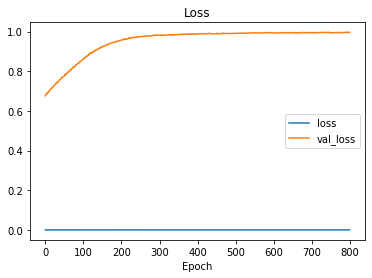

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

In [79]:
prediction = model.predict_classes(X_test)
print("Predicted digit:", str(prediction))

Predicted digit: [6 1 1 5 2 0 3 5 2 9 0 8 8 2 8 4 0 0 8 4 3 3 4 5 3 4 3 1 2 5 8 2 9 8 8 2 0
 3 0 6 3 8 1 4 5 6 7 8 1 1 0 2 0 8 4 1 5 8 7 3 4 5 2 5 7 6 7 7 6 2 4 4 7 1
 0 0 2 1 9 4 9 8 6 6 9 9 7 9 6 9 3 7 1 0 8 1 1 8 4 0 6 1 8 7 5 1 0 8 9 6 9
 2 3 5 6 4 5 1 7 7 4 6 3 6 1 6 4 2 4 1 0 9 0 5 5 9 1 9 3 8 6 8 0 1 5 2 5 0
 8 0 9 5 9 8 2 1 7 2 2 1 9 6 0 5 9 6 7 7 8 4 8 7 5 5 4 4 0 7 5 7 0 0 3 1 4
 6 1 1 9 7 5 6 5 4 4 2 9 9 2 1 8 8 7 2 2 2 1 4 8 3 5 9 7 7 9 7 5 0 2 8 3 2
 4 5 9 5 7 5 7 4 0 6 7 0 7 2 1 8 8 9 3 0 5 4 5 6 4 0 4 4 2 4 3 7 8 9 3 1 0
 6 8 3 2 6 7 1 7 2 9 1 3 8 5 9 2 9 1 9 8 9 2 8 1 0 4 3 4 8 7 9 3 3 8]


In [80]:
y_valid

array(['6', '1', '1', '8', '2', '9', '9', '3', '2', '1', '8', '8', '8',
       '6', '6', '9', '5', '0', '8', '4', '4', '3', '4', '5', '7', '5',
       '4', '1', '6', '5', '9', '6', '7', '8', '8', '1', '0', '9', '0',
       '6', '2', '8', '1', '4', '3', '0', '9', '8', '1', '1', '0', '3',
       '0', '8', '2', '1', '5', '9', '7', '8', '4', '8', '3', '7', '7',
       '6', '7', '0', '9', '2', '7', '9', '7', '1', '0', '0', '2', '1',
       '3', '0', '4', '8', '2', '6', '4', '9', '3', '9', '6', '7', '0',
       '7', '4', '0', '6', '4', '1', '4', '6', '0', '7', '0', '8', '7',
       '5', '1', '0', '8', '9', '6', '7', '2', '9', '5', '3', '4', '5',
       '1', '8', '8', '7', '6', '2', '6', '1', '6', '9', '2', '4', '1',
       '0', '4', '0', '5', '8', '9', '1', '7', '9', '8', '6', '8', '0',
       '1', '6', '2', '5', '0', '6', '0', '9', '5', '4', '0', '6', '1',
       '7', '2', '0', '1', '3', '6', '0', '6', '2', '6', '2', '1', '3',
       '4', '3', '7', '0', '5', '2', '1', '0', '7', '5', '7', '0

Acurácia

In [81]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy:',score[1])

<class 'list'>
Test score: 0.920069623725813
Test accuracy: 0.9143344676535284
